# Isotopic substitution
**(MD2reflect version 0.15)**

In [1]:
# Run this cell if this notebook is in another folder than the module
import sys
sys.path.append("..")

In [2]:
import os
import periodictable

In [3]:
from md2reflect import *

## Substitution of all atoms of an element

### Load the trajectory file

In [4]:
traj=load_trajectory(os.path.join("..", "simulations", "traj3_3frames.pdb"))

<mdtraj.Trajectory with 3 frames, 29764 atoms, 3028 residues, and unitcells>
[0 1 2]
Loading time: 0:00:01.296438 (hh:mm:ss)


### Obtain the coherent scattering length of elements in trajectory

In [5]:
bc_table_neutrons = get_elements_bc_neutrons(traj)
bc_table_neutrons

{'hydrogen': ('H', -3.7409, 0.0),
 'carbon': ('C', 6.6484, 0.0),
 'nitrogen': ('N', 9.36, 0.0),
 'copper': ('Cu', 7.718, 0.0),
 'bromine': ('Br', 6.79, 0.0)}

### Substitute the scattering length density of the natural abundace element by the isotope

In [6]:
bc_carbon_13 = periodictable.elements.isotope("13-C").neutron.b_c
bci_carbon_13 = periodictable.elements.isotope("13-C").neutron.b_c_i
if bci_carbon_13 == None : bci_carbon_13 = 0.

bc_table_neutrons['carbon'] = ('C', bc_carbon_13, bci_carbon_13)      
bc_table_neutrons

{'hydrogen': ('H', -3.7409, 0.0),
 'carbon': ('C', 6.19, 0.0),
 'nitrogen': ('N', 9.36, 0.0),
 'copper': ('Cu', 7.718, 0.0),
 'bromine': ('Br', 6.79, 0.0)}

-----

## Substitution of specific atom types

### Load the trajectory file

In [7]:
traj=load_trajectory(os.path.join("..", "simulations", "traj3_3frames.pdb"))

<mdtraj.Trajectory with 3 frames, 29764 atoms, 3028 residues, and unitcells>
[0 1 2]
Loading time: 0:00:01.534709 (hh:mm:ss)


### Gather the atom types in the sample and their elements

In [8]:
list_atom_types_elements = find_atom_types_elements(traj) 
list_atom_types_elements

{'CU': {'CU': 'Cu'},
 'CU1': {'CU1': 'Cu'},
 'bmim': {'C1': 'C',
  'C10': 'C',
  'C2': 'C',
  'C3': 'C',
  'C4': 'C',
  'C5': 'C',
  'C6': 'C',
  'C7': 'C',
  'H': 'H',
  'H11': 'H',
  'H12': 'H',
  'H13': 'H',
  'H14': 'H',
  'H15': 'H',
  'H16': 'H',
  'H17': 'H',
  'H18': 'H',
  'H19': 'H',
  'H20': 'H',
  'H21': 'H',
  'H22': 'H',
  'H23': 'H',
  'H24': 'H',
  'N8': 'N',
  'N9': 'N'},
 'BR': {'BR': 'Br'}}

### Identify molecules and labels of the atom types to substitute

In [9]:
molecules = list_molecules(traj)
print(molecules)

[('CU1', 400), ('bmim', 1114), ('CU', 400), ('BR', 1114)]


['bmim']
 PyMOL not running, entering library mode (experimental)


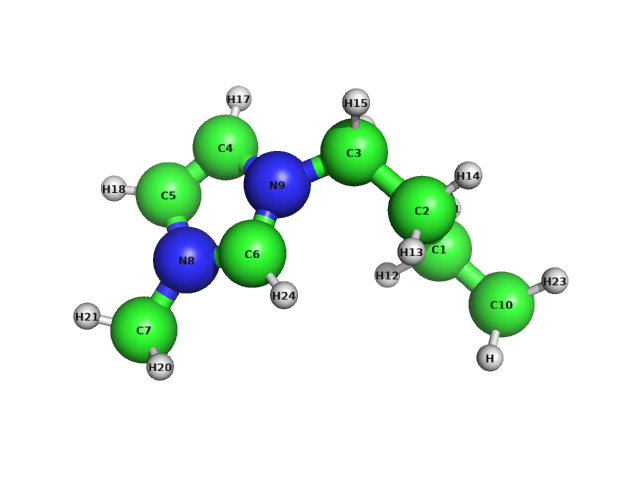

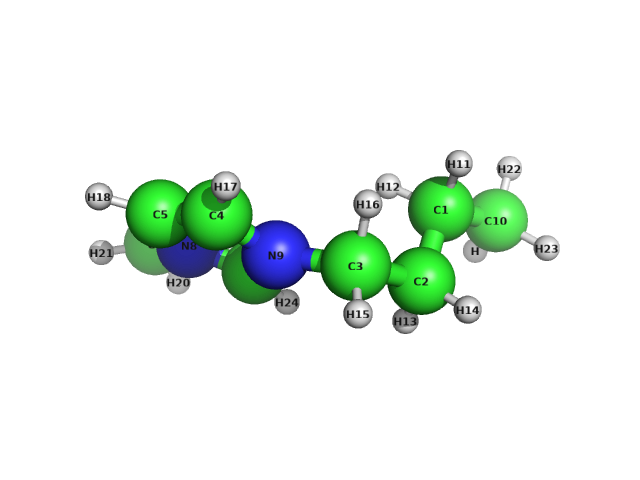

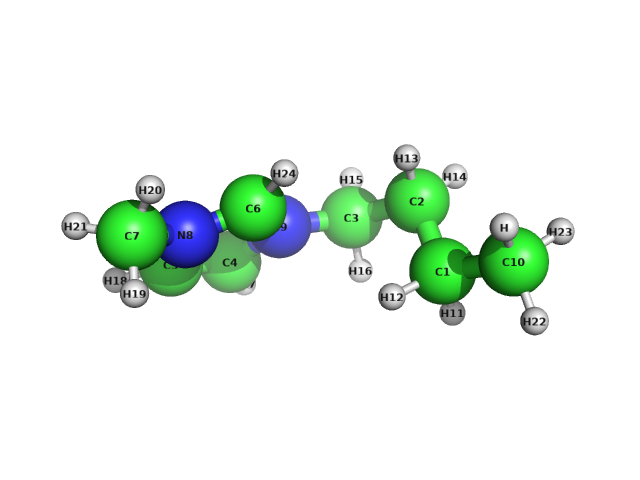

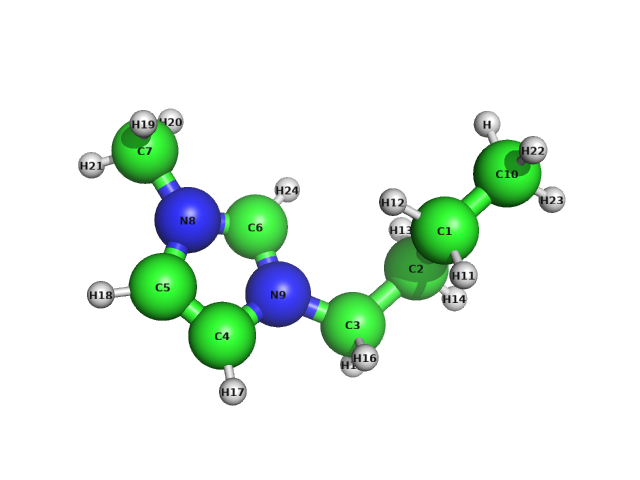

In [10]:
display_residues(traj, residues_to_find = "bmim", show=True)

This identifies all the hidrogens on the left branch as deuterated:

In [11]:
deuterated = [("bmim", "H19", "D"), ("bmim", "H18", "D"), 
              ("bmim", "H20", "D"), ("bmim", "H17", "D"), 
              ("bmim", "H21", "D"), ("bmim", "H24", "D")]

### Substitute the natural abundace of the atom types by the deuterium isotopes

In [12]:
list_atom_types_deuterated = isotopic_substitution(traj, deuterated)
list_atom_types_deuterated

{'CU': {'CU': 'Cu'},
 'CU1': {'CU1': 'Cu'},
 'bmim': {'C1': 'C',
  'C10': 'C',
  'C2': 'C',
  'C3': 'C',
  'C4': 'C',
  'C5': 'C',
  'C6': 'C',
  'C7': 'C',
  'H': 'H',
  'H11': 'H',
  'H12': 'H',
  'H13': 'H',
  'H14': 'H',
  'H15': 'H',
  'H16': 'H',
  'H17': 'D',
  'H18': 'D',
  'H19': 'D',
  'H20': 'D',
  'H21': 'D',
  'H22': 'H',
  'H23': 'H',
  'H24': 'D',
  'N8': 'N',
  'N9': 'N'},
 'BR': {'BR': 'Br'}}

### Obtain the coherent scattering length of atom types in the deuterated atom list

In [13]:
get_atom_types_bc_neutrons(list_atom_types_deuterated)

{'CU': {'CU': ('Cu', 7.718, 0.0)},
 'CU1': {'CU1': ('Cu', 7.718, 0.0)},
 'bmim': {'C1': ('C', 6.6484, 0.0),
  'C10': ('C', 6.6484, 0.0),
  'C2': ('C', 6.6484, 0.0),
  'C3': ('C', 6.6484, 0.0),
  'C4': ('C', 6.6484, 0.0),
  'C5': ('C', 6.6484, 0.0),
  'C6': ('C', 6.6484, 0.0),
  'C7': ('C', 6.6484, 0.0),
  'H': ('H', -3.7409, 0.0),
  'H11': ('H', -3.7409, 0.0),
  'H12': ('H', -3.7409, 0.0),
  'H13': ('H', -3.7409, 0.0),
  'H14': ('H', -3.7409, 0.0),
  'H15': ('H', -3.7409, 0.0),
  'H16': ('H', -3.7409, 0.0),
  'H17': ('D', 6.674, 0.0),
  'H18': ('D', 6.674, 0.0),
  'H19': ('D', 6.674, 0.0),
  'H20': ('D', 6.674, 0.0),
  'H21': ('D', 6.674, 0.0),
  'H22': ('H', -3.7409, 0.0),
  'H23': ('H', -3.7409, 0.0),
  'H24': ('D', 6.674, 0.0),
  'N8': ('N', 9.36, 0.0),
  'N9': ('N', 9.36, 0.0)},
 'BR': {'BR': ('Br', 6.79, 0.0)}}

This is the "bc_table_neutrons" with the values of the isotopic substitution that must be used to calculate the scattering length density contributions of the atom types.

----